<a href="https://colab.research.google.com/github/takumi-maker/bert/blob/main/momentum_PLScombined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [ ]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
df_1
y_df = df_1["GJGC10"]
X_df = df_1.drop("GJGC10", axis=1)
y_df

,GJGC10
0,0.030
1,0.025
2,0.030
3,0.030
4,0.045
...,...
974,1.114
975,1.114
976,1.176
977,1.172


In [ ]:
df_2 = pd.read_csv("債券複利データセット3.csv")
df_2 = df_2.drop(df_2.columns[0], axis=1)
columns_len = len(df_2.columns)
length = len(df_2)
df_2
y_df2 = df_2["GJGC7"]
X_df2 = df_2.drop("GJGC7", axis=1)
y_df2

,GJGC7
0,-0.080
1,-0.084
2,-0.079
3,-0.079
4,-0.069
...,...
974,0.863
975,0.863
976,0.902
977,0.897


In [ ]:
y_df = pd.concat([y_df, y_df2], axis=1)
y_df["select_spread"] = y_df["GJGC10"] - y_df["GJGC7"]
y_df = y_df.drop('GJGC7',axis=1)
y_df = y_df.drop('GJGC10',axis=1)

In [ ]:
y_df

,select_spread
0,0.110
1,0.109
2,0.109
3,0.109
4,0.114
...,...
974,0.251
975,0.251
976,0.274
977,0.275


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df.to_numpy()

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j][0]
    estimate_list = []
    estimate_y_list = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k][0])


    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    #objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    objective =  cp.norm2(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    #print(predict)
    #print(y_array)

    if predict >= 0.0001:
      predict_flag = -1
    elif predict <-0.0001:
      predict_flag = 1
    else:
      predict_flag = predict_flag2

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)




100
SharpRatio: -0.013914916462636854
-0.007999999999999993
200
SharpRatio: -0.023630450585893577
-0.020999999999999783
300
SharpRatio: 0.04543558388574479
0.10600000000000015
400
SharpRatio: 0.034910447376549227
0.10000000000000006
500
SharpRatio: 0.07022554898819715
0.418
600
SharpRatio: 0.04314520579416948
0.3179999999999997
700
SharpRatio: 0.009204624631061396
0.08300000000000013


In [ ]:
#モメンタム順張り
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df2.to_numpy()

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    #print(predict)
    #print(y_array)

    if predict >= 0:
      predict_flag = 1
    else:
      predict_flag = -1

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)



100
SharpRatio: -0.0326230892178026
-0.06299999999999828
200
SharpRatio: 0.04170706759989205
0.23300000000000137
300
SharpRatio: 0.05348721947359484
0.4560000000000015
400
SharpRatio: 0.06509521705929652
0.7080000000000002
500
SharpRatio: 0.04012547635171784
0.5790000000000008
600
SharpRatio: 0.049749614746188386
0.8860000000000003
700
SharpRatio: 0.04637498066731686
0.9480000000000006


100
SharpRatio: 0.1784102777214845
0.373
change_num: 4


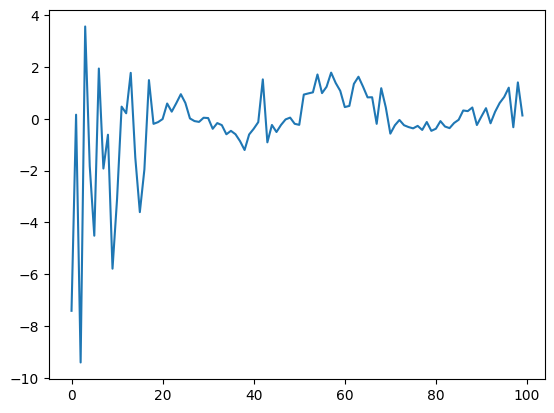

200
SharpRatio: 0.13100063785720373
0.45100000000000007
change_num: 5


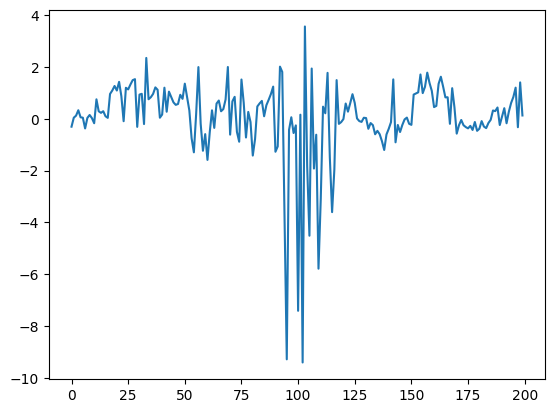

300
SharpRatio: 0.1066569483122595
0.45100000000000007
change_num: 5


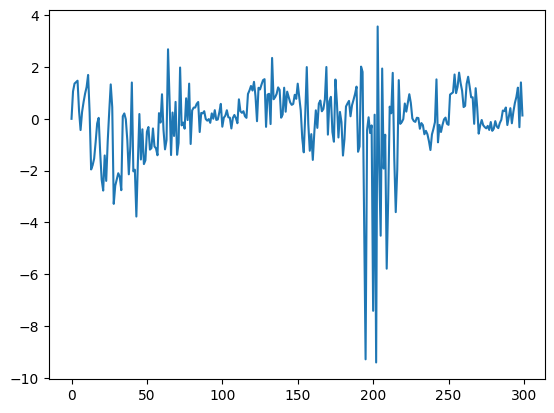

400
SharpRatio: 0.0922365628595541
0.45100000000000007
change_num: 5


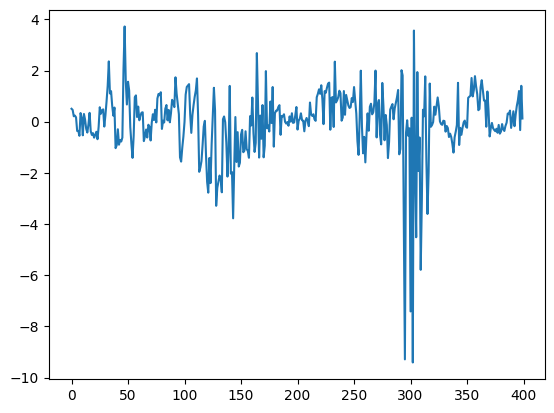

500
SharpRatio: 0.038120913360461625
0.52
change_num: 7


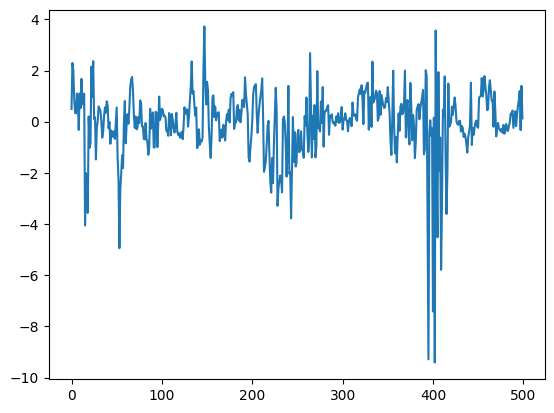

600
SharpRatio: 0.029387965870774052
0.45200000000000007
change_num: 8


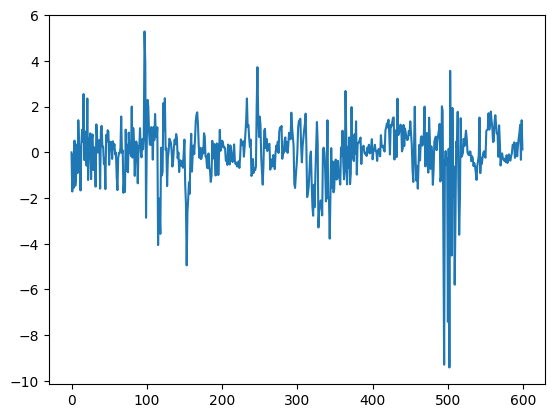

700
SharpRatio: 0.03699025193109335
0.672
change_num: 10


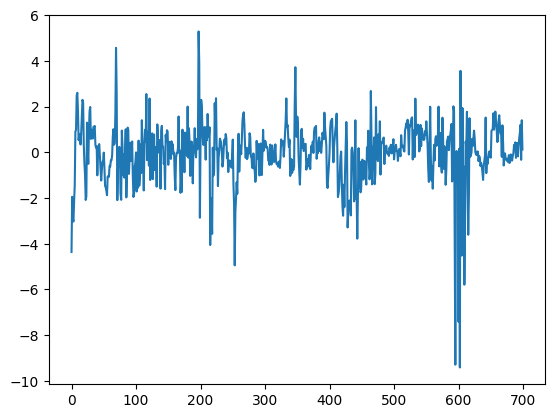

In [ ]:
#モメンタム逆張り
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df2.to_numpy()

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  change_num = 0
  score_list = []
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    estimate_list2 = []
    estimate_y_list2 = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])
    for k in range(1,estimate_num):
      estimate_list2.append(total_list[j-k])
      estimate_y_list2.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    estimate_list2 = np.array(estimate_list2)
    estimate_list2 = np.squeeze(estimate_list2)
    estimate_y_list2 = np.array(estimate_y_list2)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    predict2 = np.dot(estimate_list2,beta.value)
    #print(predict2)
    predict_score = (predict - np.mean(np.array(predict2)))/np.std(np.array(predict2))
    score_list.append(predict_score)

    #print(y_array)

    if predict_score >= 4.0:
      predict_flag = -1
      change_num +=1
    elif predict_score <-4.0:
      predict_flag = 1
      change_num +=1
    else:
      predict_flag = predict_flag2

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)
  print("change_num:",change_num)
  plt.plot(score_list)
  plt.show()

In [ ]:
!pip install cvxpy